In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [6]:
X_train = X_train.reshape((60000, 28, 28, 1))
X_test  = X_test.reshape((10000, 28, 28, 1))

In [9]:
# 0~1사이로 정규화 시키기

X_train = X_train / 255.0
X_test  = X_test / 255.0

In [10]:
# 모델 만들기 

# Conv2D(필터갯수, 커널크기)
# padding = 'valid' : output이 input보다 작아짐
# padding = 'same'  : output이 input과 같아짐.
                      # - 이미지 경계에 빈 영역을 추가할때 사용
                      # 입력 이미지의 경계를 학습하는데 효과적

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), padding = 'same', activation = 'relu', 
                        input_shape = (28, 28, 1))) # input data를 Flattening 하지 않는다.
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), padding = 'valid', activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), padding = 'valid', activation = 'relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10, activation ='softmax'))


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [12]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
history = model.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 14s 3ms/step - loss: 0.1242 - accuracy: 0.9611
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0408 - accuracy: 0.9876
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0288 - accuracy: 0.9906
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0229 - accuracy: 0.9926
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0173 - accuracy: 0.9946


In [13]:
model.evaluate(X_test, y_test, verbose = 2)

313/313 - 1s - loss: 0.0260 - accuracy: 0.9922 - 886ms/epoch - 3ms/step


[0.02598138339817524, 0.9922000169754028]

[0.9611166715621948, 0.9875666499137878, 0.9906499981880188, 0.9926166534423828, 0.9945833086967468]
[0.12417727708816528, 0.04081884026527405, 0.02875121496617794, 0.022862110286951065, 0.017342032864689827]


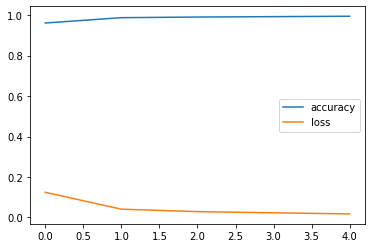

In [15]:
y_acc = history.history['accuracy']
y_loss = history.history['loss']

print(y_acc)
print(y_loss)

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_acc, label = "accuracy")
plt.plot(x_len, y_loss, label = 'loss')
plt.legend()
plt.show()

In [33]:
# 예측한 실제 결과를 살펴보자.

preds = model.predict(X_test, batch_size = 128)

y_pred = np.array([np.argmax(preds[loc]) for loc in range(len(X_test))])

79/79 [==============================] - 0s 2ms/step


In [34]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [35]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

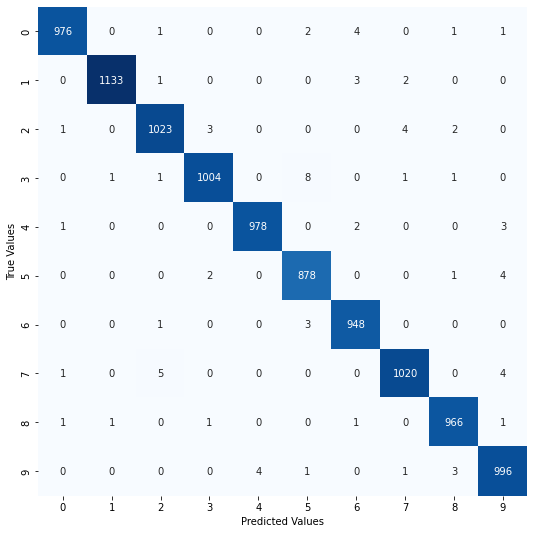

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize = (9,9))
mat = confusion_matrix(y_test, y_pred)

sns.heatmap(mat.T, square = True, annot = True, 
            cbar = False, cmap = plt.cm.Blues, fmt = 'd')
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

In [40]:
count = 0
for k in range(len(y_test)):
  if y_pred[k] != y_test[k]:
    count += 1

accuracy = 1 - count/len(y_test)
print("총 데이터 수 : {}".format(len(y_test)))
print("잘못예측한 데이터 수 : {}".format(count))
print("정확도 : {:1.2f}%".format(accuracy))

총 데이터 수 : 10000
잘못예측한 데이터 수 : 78
정확도 : 0.99%


In [41]:
wrong = []
for k in range(len(y_test)):
  if y_pred[k] != y_test[k]:
    wrong.append(k)

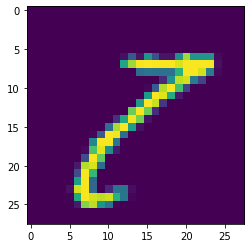

예측값 :  2
실제값 :  7




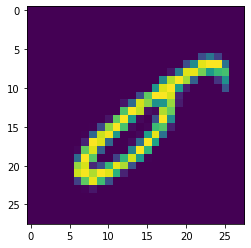

예측값 :  8
실제값 :  0




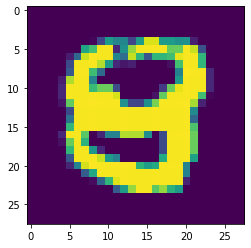

예측값 :  9
실제값 :  8




In [46]:
import random

for loc in random.sample(wrong, 3):
  plt.imshow(X_test[loc].reshape(28,28))
  plt.show()

  print("예측값 : ", y_pred[loc])
  print("실제값 : ", y_test[loc])
  print("\n")
